In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load data
df=pd.read_csv(r'C:\Users\Admin\Desktop\Viska\Machine Learning\Day14-19-May-24-Project K Mean/customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# we have to use clustring on Age and Spending Score (1-100) column.
# Now we need only Age and Spending Score column
x = df[['Age','Spending Score (1-100)']]
x

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


<function matplotlib.pyplot.show(close=None, block=None)>

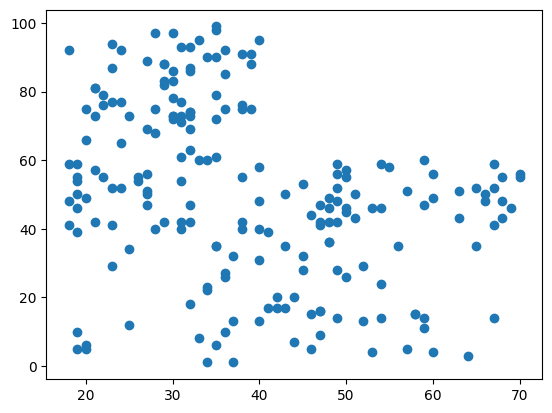

In [8]:
## Ploting chart
plt.scatter(x['Age'],x['Spending Score (1-100)'])
plt.show

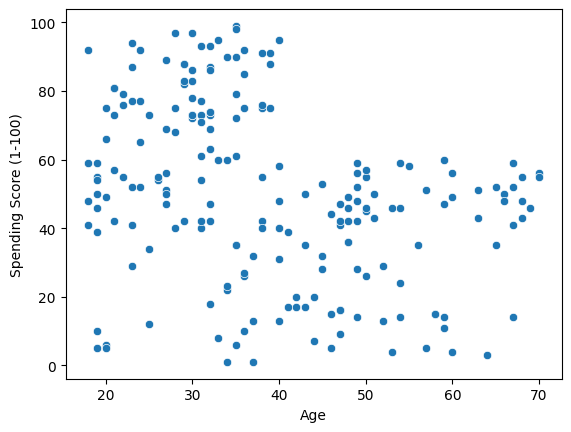

In [9]:
sns.scatterplot(x=x['Age'],y=x['Spending Score (1-100)'])
plt.show()

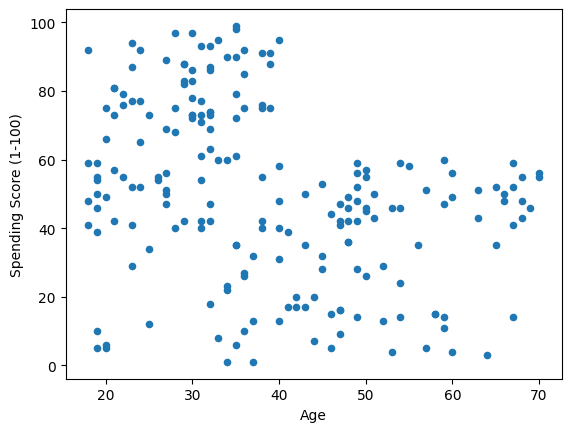

In [10]:
# 3. plot using the dataframe
x.plot(kind = 'scatter', x = 'Age', y = 'Spending Score (1-100)')
plt.show()

In [11]:
# Loading the K Means ML Algorithm

In [12]:
# Finding the optimal number of clusters

In [13]:
from sklearn.cluster import KMeans

In [14]:
# here we have to find out the value of k.
# value of k = 1,2,3,4,5,6,7,8,9,10

Error=[]# Blank list

for i in range (1,11):
    model1=KMeans(n_clusters=i)
    model1.fit(x)
    Error.append(model1.inertia_)




In [15]:
Error

[171535.50000000003,
 75949.15601023019,
 45840.67661610866,
 28165.583566629342,
 23904.05334282951,
 19693.22493708865,
 17990.175592807504,
 14517.978725660301,
 11519.02281982157,
 10536.701270621223]

In [16]:
# Now we will be plotting the elbow curve using the Error values
# value of k in where this error sharp band.

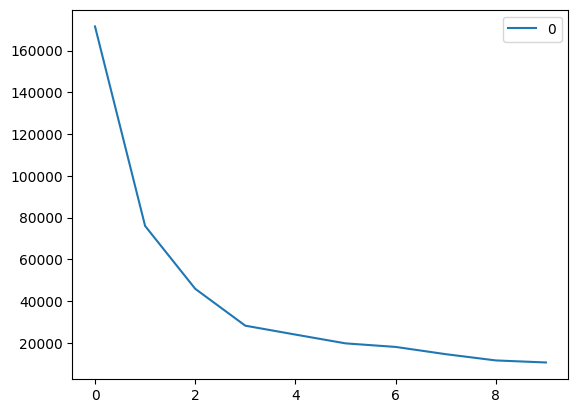

In [17]:
pd.DataFrame(Error).plot()
plt.show()

In [ ]:
#from the above curve the K value should be K=3

In [18]:
model2=KMeans(n_clusters=3)
model2.fit(x)

KMeans(n_clusters=3)

In [19]:
#seeing the cluster (n_cluster=3 means 0,1,2)
my_cluster = model2.labels_
my_cluster

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [20]:
complete_data=x.assign(cluster=my_cluster)
complete_data

,Age,Spending Score (1-100),cluster
0,19,39,1
1,21,81,0
2,20,6,2
3,23,77,0
4,31,40,1
...,...,...,...
195,35,79,0
196,45,28,2
197,32,74,0
198,32,18,2


In [21]:
## Plotting the clusters

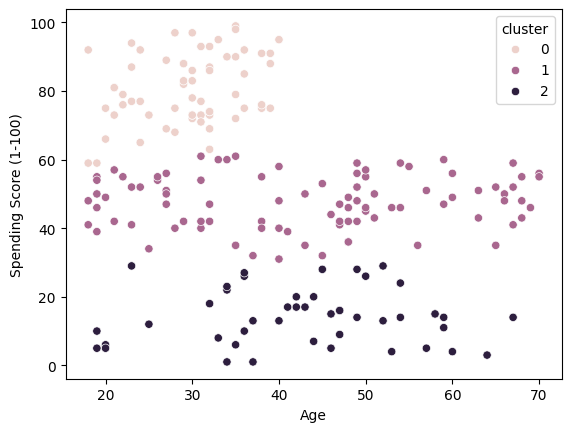

In [22]:
sns.scatterplot(x = complete_data['Age'], y = complete_data['Spending Score (1-100)']
                , hue = complete_data['cluster'])
plt.show()

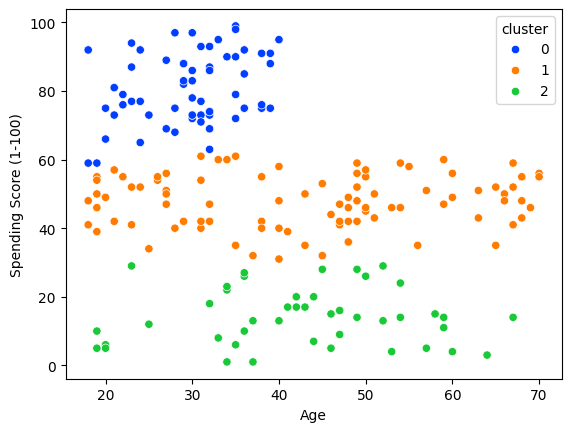

In [23]:
sns.scatterplot(x = complete_data['Age'], y = complete_data['Spending Score (1-100)']
                , hue = complete_data['cluster'],palette='bright')
plt.show()